In [5]:
from py2neo import Graph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
graph = Graph("bolt://127.0.0.1:7687", auth=("neo4j", "astraloom123"))

In [7]:
query = """
MATCH (a)-[r]->(b)
RETURN a.id AS source, type(r) AS relation, b.id AS target
LIMIT 100
"""
data = graph.run(query).to_data_frame()


In [8]:
print(data.head())

           source         relation               target
0  mission/EOS-09      LAUNCHED_BY     vehicle/PSLV-C61
1  mission/EOS-09      APPLICATION  application/unknown
2  mission/EOS-09       ORBIT_TYPE        orbit/unknown
3  mission/EOS-09  HAS_DESCRIPTION              unknown
4  mission/EOS-09      LAUNCHED_ON           2025-05-18


In [9]:
# Create a NetworkX graph from the data
G = nx.DiGraph()

for _, row in data.iterrows():
    G.add_node(row['source'])
    G.add_node(row['target'])
    G.add_edge(row['source'], row['target'], label=row['relation'])


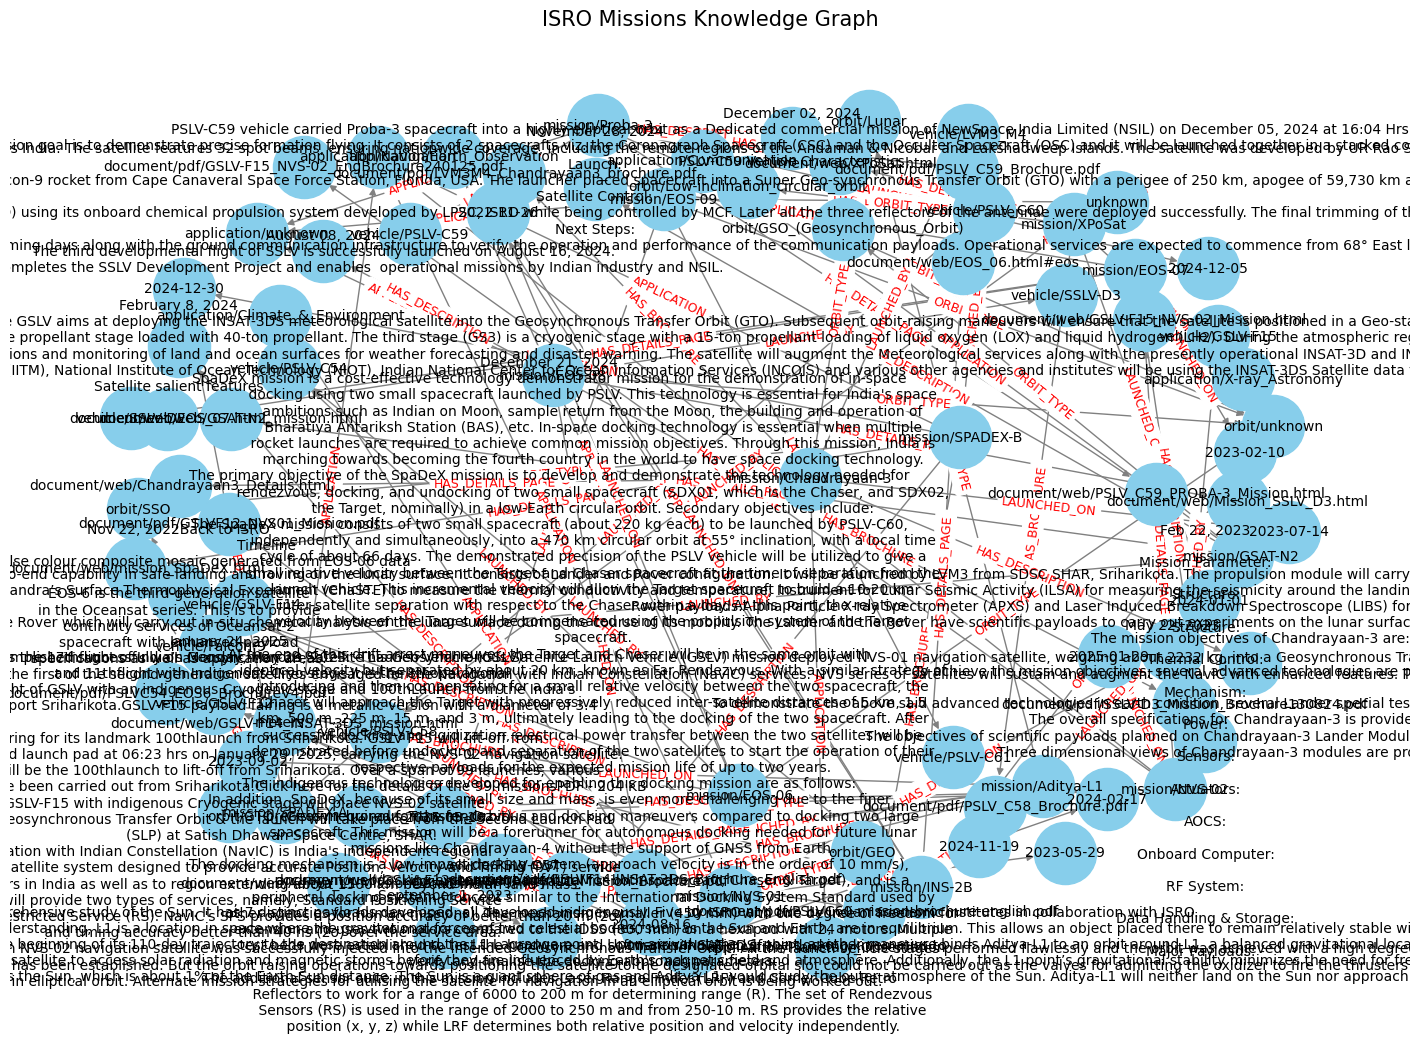

In [10]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=1, iterations=20)

# Draw nodes & labels
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, edge_color="gray", font_size=10)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=9)

plt.title("ISRO Missions Knowledge Graph", fontsize=15)
plt.axis("off")
plt.show()